# Data Mining and Visualization 

In [2]:
# Import
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Global Variables
DATA_DIR = os.path.abspath('../Data')
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TRAIN_FILES_LIST = [os.path.join(TRAIN_DIR, i) for i in os.listdir(TRAIN_DIR)]

NUM_OF_TIMESTAMPS = 50

In [4]:
# Preparing Data
timestamp_to_file = {}
for filename in TRAIN_FILES_LIST:
    with h5py.File(filename) as d:
        timestamp_to_file = {
            **timestamp_to_file,
            **dict(map(lambda x: (x, filename), d.keys()))
        }

timestamps = np.unique(sorted(timestamp_to_file.keys()))

data_values = {
    "intensity": np.empty((1, 1)),
    "events": np.empty((1, 1)),
    "reflectivity": [np.empty((1, 1)) for i in range(10)],
    "radial_velocity": [np.empty((1, 1)) for i in range(10)]
}
for timestamp in timestamps[:NUM_OF_TIMESTAMPS]:
    with h5py.File(timestamp_to_file[timestamp]) as d:
        data_values["intensity"] = np.append(data_values["intensity"], d[timestamp]["intensity"][:].reshape((1, 63504)), axis=1)
        data_values["events"] = np.append(data_values["events"], d[timestamp]["events"][:].reshape((1, 63504)), axis=1)
        for i in range(10):
            data_values["radial_velocity"][i] = np.append(data_values["radial_velocity"][i], d[timestamp]["radial_velocity"][:][i].reshape((1, 63504)), axis=1)
            data_values["reflectivity"][i] = np.append(data_values["reflectivity"][i], d[timestamp]["reflectivity"][:][i].reshape((1, 63504)), axis=1)

data_values["intensity"] = data_values["intensity"][0, 1:]
data_values["events"] = data_values["events"][0, 1:]
for i in range(10):
    data_values["radial_velocity"][i] = data_values["radial_velocity"][i][0, 1:]
    data_values["reflectivity"][i] = data_values["reflectivity"][i][0, 1:]

data_values_raw = {
    "intensity": data_values["intensity"].copy(),
    "events": data_values["events"].copy(),
    **{f"radial_velocity_{i}": data_values["radial_velocity"][i].copy() for i in range(10)},
    **{f"reflectivity_{i}": data_values["reflectivity"][i].copy() for i in range(10)},
}

data_values["intensity"] = data_values["intensity"][(data_values["intensity"] != -1e6) & (data_values["intensity"] != -2e6)]
data_values["events"] = data_values["events"][(data_values["events"] != -1e6) & (data_values["events"] != -2e6)]
for i in range(10):
    data_values["radial_velocity"][i] = data_values["radial_velocity"][i][(data_values["radial_velocity"][i] != -1e6) & (data_values["radial_velocity"][i] != -2e6)]
    data_values["reflectivity"][i] = data_values["reflectivity"][i][(data_values["reflectivity"][i] != -1e6) & (data_values["reflectivity"][i] != -2e6)]
data_values["radial_velocity"] = np.concatenate([data_values['radial_velocity'][i] for i in range(10)], axis=0)
data_values["reflectivity"] = np.concatenate([data_values['reflectivity'][i] for i in range(10)], axis=0)

data_sample = {
    "intensity": None,
    "events": None,
    "reflectivity": None,
    "radial_velocity": None
}
with h5py.File(timestamp_to_file[timestamps[0]]) as d:
    data_sample["intensity"] = d[timestamps[0]]["intensity"][:]
    data_sample["events"] = d[timestamps[0]]["events"][:]
    data_sample["radial_velocity"] = [d[timestamps[0]]["radial_velocity"][:][i] for i in range(10)]
    data_sample["reflectivity"] = [d[timestamps[0]]["reflectivity"][:][i] for i in range(10)]

In [5]:
# Basic Information
print(timestamps.shape, '- timestamps shape\n')

# Intensity
print(f'Intensity:\n----------------\nstd: {np.std(data_values["intensity"])}\nmean: {np.mean(data_values["intensity"])}\nmedian: {np.median(data_values["intensity"])}\nmin: {np.min(data_values["intensity"])}\nmax: {np.max(data_values["intensity"])}\n')
# Events
print(f'Events:\n----------------\nstd: {np.std(data_values["events"])}\nmean: {np.mean(data_values["events"])}\nmedian: {np.median(data_values["events"])}\nmin: {np.min(data_values["events"])}\nmax: {np.max(data_values["events"])}\n')
# Radial Velocity
print(f'Radial Velocity:\n----------------\nstd: {np.std(data_values["radial_velocity"])}\nmean: {np.mean(data_values["radial_velocity"])}\nmedian: {np.median(data_values["radial_velocity"])}\nmin: {np.min(data_values["radial_velocity"])}\nmax: {np.max(data_values["radial_velocity"])}\n')
# Reflectivity
print(f'Reflectivity:\n----------------\nstd: {np.std(data_values["reflectivity"])}\nmean: {np.mean(data_values["reflectivity"])}\nmedian: {np.median(data_values["reflectivity"])}\nmin: {np.min(data_values["reflectivity"])}\nmax: {np.max(data_values["reflectivity"])}\n')

(51769,) - timestamps shape

Intensity:
----------------
std: 0.9664792932198807
mean: 0.6116107681240747
median: 0.3393175005912781
min: 0.00039183773333206773
max: 39.183773040771484

Events:
----------------
std: 1.4724715732517477
mean: 3.4676468536926395
median: 4.0
min: 1.0
max: 9.0

Radial Velocity:
----------------
std: 9.079240385491936
mean: 1.1949234334837833
median: 3.5
min: -35.5
max: 35.0

Reflectivity:
----------------
std: 8.266199226690107
mean: 6.454112873461209
median: 6.0
min: -31.5
max: 48.0



<AxesSubplot:title={'center':'reflectivity'}, ylabel='Count'>

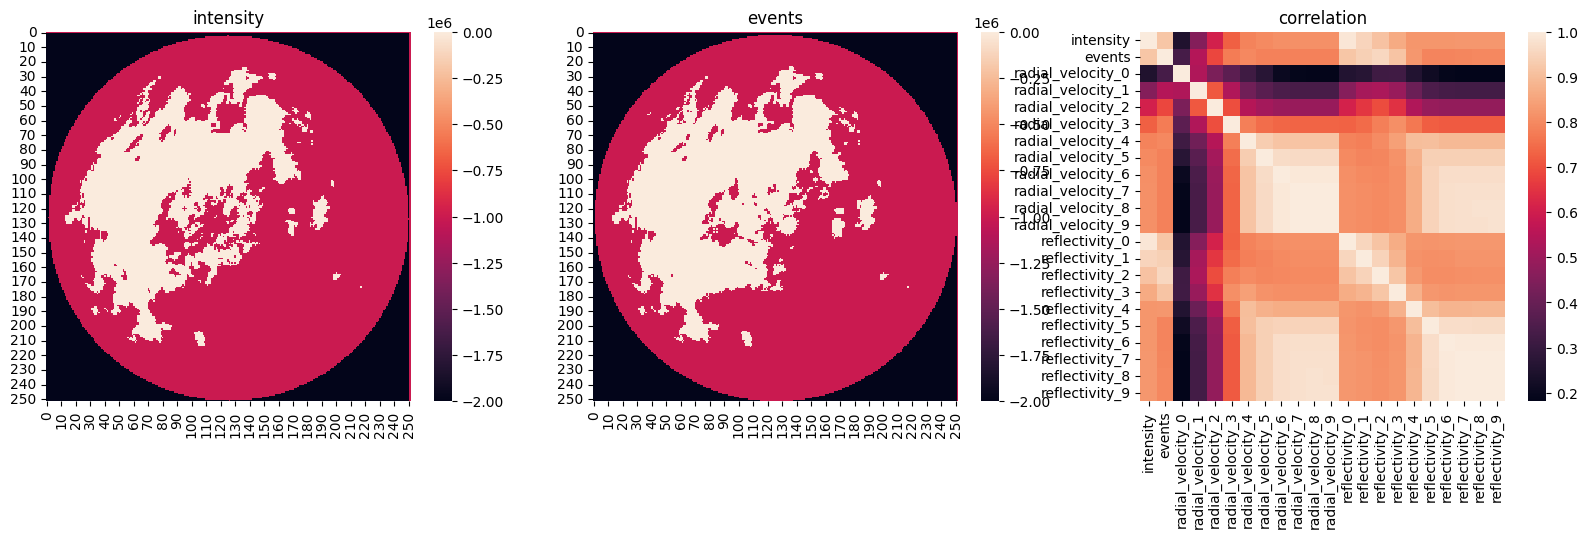

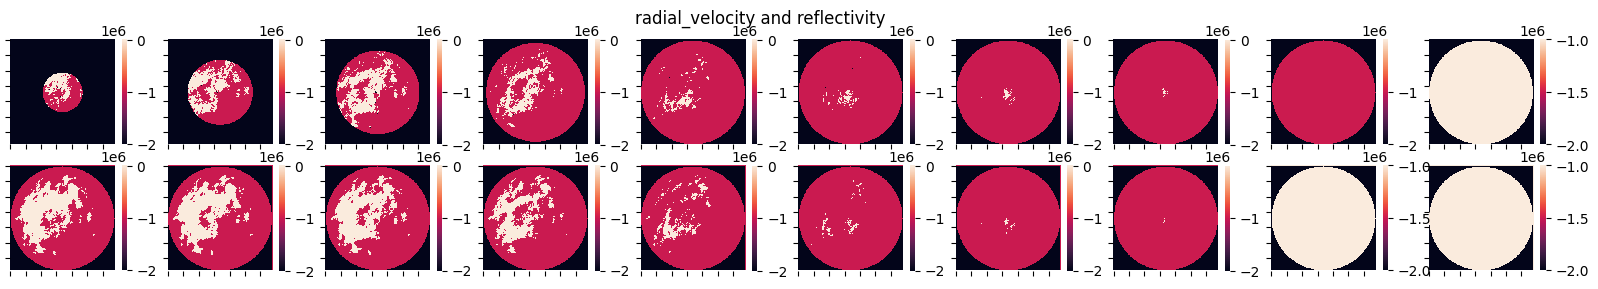

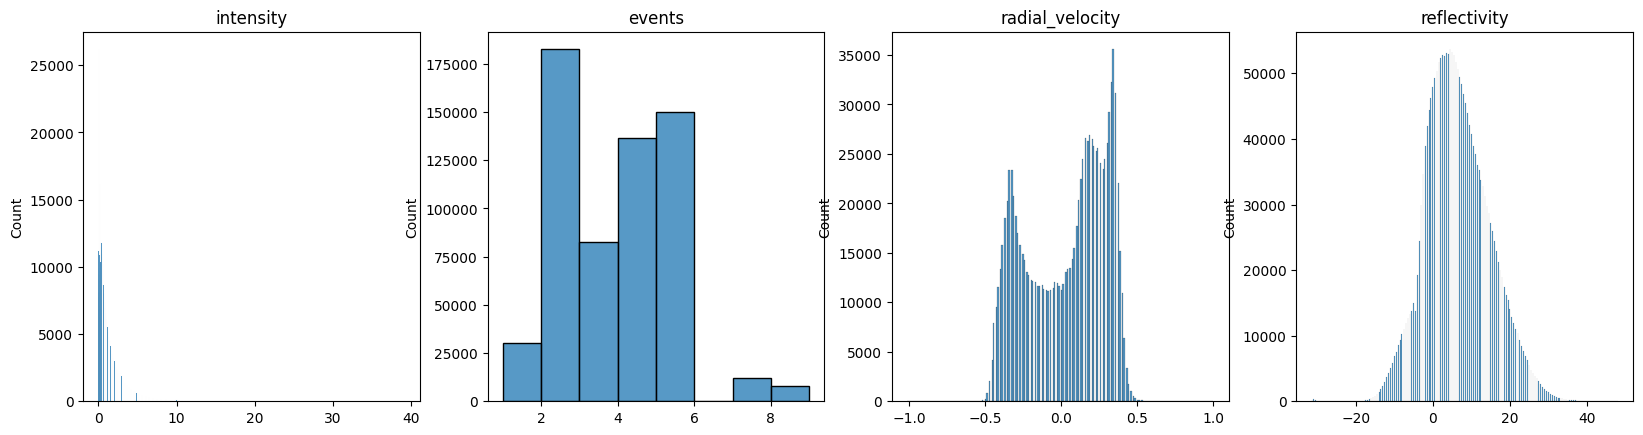

In [7]:
# Visualization
# Samples
fig_samples_single_row, ax_samples_single_row = plt.subplots(nrows=1, ncols=3)
fig_samples_single_row.set_figwidth(20)

# intensity
ax_samples_single_row[0].set_title("intensity")
sns.heatmap(data_sample["intensity"], ax=ax_samples_single_row[0])

# events
ax_samples_single_row[1].set_title("events")
sns.heatmap(data_sample["events"], ax=ax_samples_single_row[1])

# correlation
ax_samples_single_row[2].set_title("correlation")
sns.heatmap(pd.DataFrame(data_values_raw).corr(), ax=ax_samples_single_row[2])

fig_samples_mult_row, ax_samples_mult_row = plt.subplots(nrows=2, ncols=10)
fig_samples_mult_row.set_figwidth(20)
fig_samples_mult_row.set_figheight(3)
fig_samples_mult_row.suptitle("radial_velocity and reflectivity")

# radial_velocity
for i in range(10):
    g = sns.heatmap(data_sample["radial_velocity"][i], ax=ax_samples_mult_row[0][i])
    g.set(xticklabels=[], yticklabels=[])

# reflectivity
for i in range(10):
    g = sns.heatmap(data_sample["reflectivity"][i], ax=ax_samples_mult_row[1][i])
    g.set(xticklabels=[], yticklabels=[])

# histograms
fig_hist, ax_hist = plt.subplots(nrows=1, ncols=4)
fig_hist.set_figwidth(20)

# intensity
ax_hist[0].set_title("intensity")
sns.histplot(data_values["intensity"], ax=ax_hist[0])

# events
ax_hist[1].set_title("events")
sns.histplot(data_values["events"], ax=ax_hist[1], binwidth=1)

# radial_velocity
ax_hist[2].set_title("radial_velocity")
sns.histplot(data_values["radial_velocity"], ax=ax_hist[2])

# reflectivity
ax_hist[3].set_title("reflectivity")
sns.histplot(data_values["reflectivity"], ax=ax_hist[3])